<a href="https://colab.research.google.com/github/yishairasowsky/Sefaria-Project/blob/master/machine_leanring/topic_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd

In [0]:
prayer_df = pd.read_csv('/content/prayer-sources.csv', 
                        # encoding="latin-1"
                        )
not_prayer_df = pd.read_csv('/content/not-prayer-sources.csv', 
# not_prayer_df = pd.read_csv('/content/not-prayer-sources-more.csv', 
                            # encoding="latin-1"
                            )

In [12]:
prayer_df.sample(3)

,Ref,En,He
6,Berakhot 10b:27-30,That was also taught in a baraita : One should...,תַּנְיָא נָמֵי הָכִי: לֹא יַעֲמוֹד אָדָם לֹא ע...
337,"Shem MiShmuel, Yom Kippur 5:3",NaN,"נראה דהנה מצינו שתי מיני טהרות, אדם וכלים שנטמ..."
643,"Shem MiShmuel, Chayei Sara 9:20",NaN,יש לדקדק בתפלת אליעזר שלא כתיב בו שום לשון מעש...


In [13]:
prayer_df['is_prayer'] = 'yes'
prayer_df = prayer_df[['En','is_prayer']]

prayer_df.tail(3)

,En,is_prayer
1049,"It is true that you are the one who judges, an...",yes
1050,In these Berachot (blessings) we bow down: the...,yes
1051,On seeds he says [the Beracha (blessing)] Bore...,yes


In [14]:
not_prayer_df.sample(3)

,Ref,En,He,Topics
217,Kometz HaMincha 2:50:1,NaN,"ויהיו חיי שרה, נסמך אחר עקידה ובשורת רבקה כידו...",man-and-wife
787,Zohar 3:242a:9,NaN,דְּאִיהִי רְשׁוּת הַיָּחִיד דִּילֵיהּ וְעַמּוּ...,cecum
542,"Tur, Choshen Mishpat 417:8",NaN,"לקח חצר ובה זיזין וגזוזטראות בולטין לר""ה הרי ה...",laws-of-damages-from-a-pit


In [15]:
not_prayer_df['is_prayer'] = 'no'
not_prayer_df = not_prayer_df[['En','is_prayer']]
not_prayer_df.sample(3)

,En,is_prayer
1043,NaN,no
823,2. This is the meaning of [the opening verse]:...,no
649,NaN,no


In [16]:
all_prayer_frames = [prayer_df, not_prayer_df]
all_prayer_df = pd.concat(all_prayer_frames)
all_prayer_df.reset_index(inplace=True)
# all_prayer_df.style.set_properties({'align': 'right'})

# all_prayer_df.tail(3)
all_prayer_df.sample(5)
# all_prayer_df.loc[[345]]

,index,En,is_prayer
1638,586,"When Jehoiakim came along and reigned, he said...",no
2102,1050,NaN,no
844,844,NaN,yes
1292,240,"Rather, if it was stated it was stated as foll...",no
930,930,If one was reading in the Torah [the section o...,yes


In [17]:
print("Before dropping duplicates",all_prayer_df.shape)
all_prayer_df.drop_duplicates(inplace=True)
print("After dropping duplicates",all_prayer_df.shape)
print("Nulls before dropping:",all_prayer_df.isnull().sum()[0])
all_prayer_df.dropna(inplace=True)
print("Nulls after dropping:",all_prayer_df.isnull().sum()[0])
# all_prayer_df.isnull().sum()
# all_prayer_df.sample(5)

Before dropping duplicates (2103, 3)
After dropping duplicates (2103, 3)
Nulls before dropping: 0
Nulls after dropping: 0


In [18]:
del all_prayer_df['index']
all_prayer_df.sample(3)

,En,is_prayer
1185,And Moses went down from the mount unto the pe...,no
495,We learned in the mishna that Rabbi Eliezer sa...,yes
1226,"Dies gilt aber nur, wenn alle drei Zeugen sich...",no


In [19]:
shape = all_prayer_df.shape
print(f"{shape[0]} rows and {shape[1]} columns")

1247 rows and 2 columns


In [20]:
all_prayer_df['is_prayer'] = all_prayer_df['is_prayer'].map({'no': 0, 'yes': 1})
all_prayer_df.sample(5)

,En,is_prayer
395,There are certain persons for whom it is suffi...,1
209,And this thing is from the ways of repentance....,1
430,And since it is difficult for the mind to reme...,1
1430,This happens in two manners. One possibility i...,0
982,The Sages taught in a Tosefta : A blind person...,1


In [21]:
print('Prayer:', (all_prayer_df.is_prayer.values == 1).sum())
print('Not prayer:', (all_prayer_df.is_prayer.values == 0).sum())

Prayer: 579
Not prayer: 668


In [22]:
import re
import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def process_text(text):
    #  text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

from nltk.stem.snowball import SnowballStemmer

stemmer = SnowballStemmer("english")

def stemming(sentence):
    stemSentence = ""
    for word in sentence.split():
        stem = stemmer.stem(word)
        stemSentence += stem
        stemSentence += " "
    stemSentence = stemSentence.strip()
    return stemSentence

# whitelist = set('abcdefghijklmnopqrstuvwxyz ZXCVBNMASDFGHJKLQWERTYUIOP')
# genres['movie_id'] = genres['movie_id'].astype(str)

# def process_text(text):
#     '''
#     1. Keep only letters and spaces
#     2. Remove stopwords
#     3. Return str of clean text words
#     '''
#     #1
#     chars_str = ''.join(filter(whitelist.__contains__, text))
#     #2
#     clean_words = [word.lower() for word in chars_str.split() if word.lower() not in stopwords.words('english')]
#     #3
#     return ' '.join(clean_words)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
sample_text = '''aBC.!@#$%^&    c*(בחתו ‎‎‎ או‎ בקרחתו — une...
233 the gns: ac ...
1041    7. a pien p'''
process_text(sample_text)

'abc # c une233 gns ac 1041 7 pien p'

In [24]:
# all_prayer_df['En'].head().apply(process_text)
all_prayer_df['En'] = all_prayer_df['En'].apply(process_text)
all_prayer_df['En'] = all_prayer_df['En'].apply(stemming)
all_prayer_df.head()
# all_prayer_df.loc[[345]]


,En,is_prayer
0,anoth abba binyamin statement regard law praye...,1
1,taught baraita abba binyamin said one prayer f...,1
2,addit ravin bar rav adda said rabbi yitzak sai...,1
3,similar taught baraita rabbi yishmael ben elis...,1
4,mean written let prayer unto lord time favor g...,1


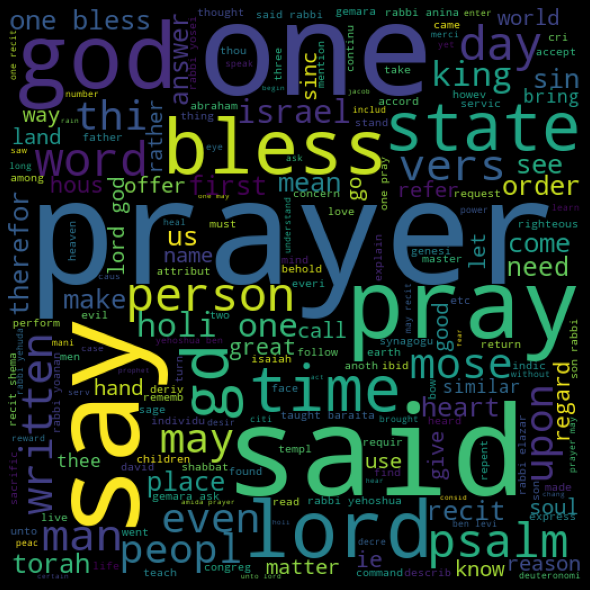

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 1]['En']))
prayer_wc = WordCloud(width = 512,height = 512).generate(prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

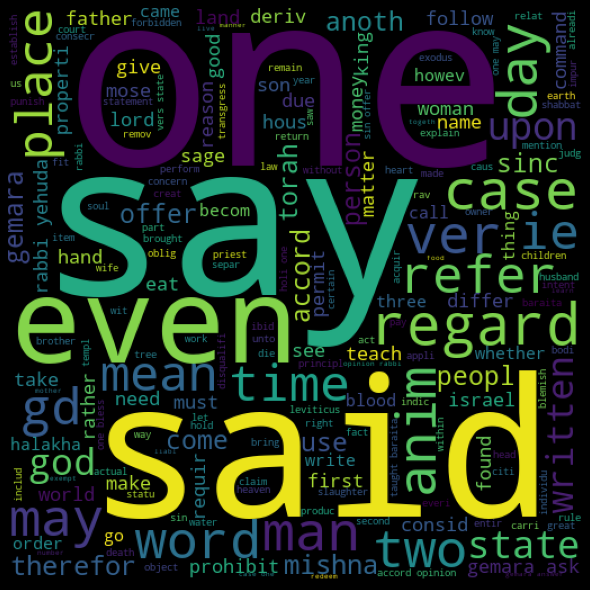

In [26]:
not_prayer_words = ' '.join(list(all_prayer_df[all_prayer_df['is_prayer'] == 0]['En']))
not_prayer_wc = WordCloud(width = 512,height = 512).generate(not_prayer_words)
plt.figure(figsize = (10, 8), facecolor = 'k')
plt.imshow(not_prayer_wc)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()

In [27]:
X = all_prayer_df.En
y = all_prayer_df.is_prayer
print(f"Totals: {X.shape} / {y.shape}")

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

print(f"\nTrain: {X_train.shape} / {y_train.shape}")

print(f"\nTest: {X_test.shape} / {y_test.shape}")

Totals: (1247,) / (1247,)

Train: (935,) / (935,)

Test: (312,) / (312,)


In [35]:
# Convert a collection of text documents to a matrix of token counts

from sklearn.feature_extraction.text import CountVectorizer, HashingVectorizer, TfidfVectorizer

# vectorizer = CountVectorizer(analyzer=process_text)
# vectorizer = CountVectorizer(ngram_range=(2, 4))
# vectorizer = HashingVectorizer(ngram_range=(2, 4),alternate_sign=False)
vectorizer = TfidfVectorizer(ngram_range=(2, 4))
# vectorizer.fit(X_train)
# vectorizer.get_feature_names()


NotFittedError: ignored

In [37]:
print("Shape of document term matrix")

# X_train_dtm = vectorizer.transform(X_train)
X_train_dtm = vectorizer.fit_transform(X_train)
print(f"Train: {X_train_dtm.shape}")

# prayer_bag_of_words = vectorizer.fit_transform(all_prayer_df['En'])
X_test_dtm = vectorizer.transform(X_test)
print(f"Test: {X_test_dtm.shape}")


Shape of document term matrix
Train: (935, 168961)
Test: (312, 168961)


In [38]:

print(vectorizer.get_feature_names())


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB, ComplementNB

classifier = MultinomialNB()
# classifier = ComplementNB()

# for Gaussian need array format
# X_train = X_train.toarray()
# X_test = X_test.toarray()
# classifier = GaussianNB()
# classifier = BernoulliNB()

%time classifier.fit(X_train_dtm, y_train)
y_pred_class = classifier.predict(X_test_dtm)
from sklearn import metrics
print('\nAccuracy:',metrics.accuracy_score(y_test, y_pred_class))
print("\nHow many prayer (1) and non prayer (0)?")
print(y_test.value_counts())
null_accuracy = y_test.value_counts().head(1) / len(y_test)
print('\nNull accuracy:', null_accuracy)

negs = y_test.value_counts()[0]
poss = y_test.value_counts()[1]
print('Manual null accuracy:',(1 / (1 + negs/poss)))

print("\nConfusion Matrix:")
metrics.confusion_matrix(y_test, y_pred_class)

CPU times: user 9.06 ms, sys: 7.03 ms, total: 16.1 ms
Wall time: 16.2 ms

Accuracy: 0.8461538461538461

How many prayer (1) and non prayer (0)?
0    159
1    153
Name: is_prayer, dtype: int64

Null accuracy: 0    0.509615
Name: is_prayer, dtype: float64
Manual null accuracy: 0.4903846153846154

Confusion Matrix:


array([[139,  20],
       [ 28, 125]])

In [31]:
TP = X_test[y_pred_class + y_test == 2]
TN = X_test[y_pred_class + y_test == 0]
FP = X_test[y_pred_class > y_test]
FN = X_test[y_pred_class < y_test]

pd.options.display.max_colwidth = 100

# pd.style.set_properties(**{'text-align': 'left'})

# print("\n*** TP ***")
# print(TP.sample(5))
# print("\n*** TN ***")
# print(TN.sample(5))
print("\n*** FP ***")
print(FP.sample(10))
print("\n*** FN ***")
print(FN.sample(10))


*** FP ***
1120                                             rabbi iyya bar abba said rabbi yoanan said one brother die
1139                                                              trust ye lord ever lord god everlast rock
1584    numb 2014 cont know troubl befallen us said know holi one said abraham gen 1513 know full well s...
1708    rabbi ama bar anina say holi one bless fashion ten canopi adam first man garden eden state hiram...
1383    furthermor rav kahana said cite rabbi yishmael son rabbi yosei said rabbi shimon ben lakish said...
1408    name rav rabbi yehuda said futur holi one bless rejoic righteous let shechinah dwell among every...
1766    vers state cast pur lot esther 37 sage taught follow baraita lot fell month adar haman great rej...
1749    word refer phenomena mention 6 day creation even though told gd creat univers clear verb refer g...
1768    3 truth wise man understand awesom truth heart stir trembl man therefor give heart take heed con...
1146    state mi

In [0]:
# FP.to_csv('FP', sep='\t', encoding='utf-8')
# FN.to_csv('FN', sep='\t', encoding='utf-8')
